<a href="https://colab.research.google.com/github/MehwishSameer/LetsGrowMore/blob/main/Exploratory_Data_Analysis_on_Dataset_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objectives of EDA:**

1. EDA identifies faulty points in data which cleans the data and filters the redundancies 
2. EDA helps us in identifying the relationship between variables which gives us a wider perspective on data and it helps us build on it by utilizing the relationship between the variables

**Steps of EDA:**
1. Understand the variables in the dataset.
2. Clean the data from redundancies.
3. Analyse the relationship between variables and visualize data

# 1. Understand the variables in the dataset.

In [270]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [271]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [272]:
df=pd.read_csv('/content/drive/My Drive/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [273]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [274]:
df['eventid'].nunique()

181691

In [275]:
df.shape

(181691, 135)

All the values are unique and their is no redundant data according to eventid column

# 2. Clean the data from redundancies.

*   **Exclude the unesscary columns:**

In [276]:
df=df[['iyear','imonth','iday','country_txt','region_txt','provstate','city','latitude','longitude','location','summary','attacktype1_txt',
       'targtype1_txt','gname','motive','weaptype1_txt','nkill','nwound','addnotes']]

In [277]:
df.describe()

,iyear,imonth,iday,latitude,longitude,nkill,nwound
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


**Observations:**

*   The data is from 1970 to 2017.
*   Maximum number of kills are 1570 and on average 2.
*   Maximum number of wounded people are 8191 and on average 3.

In [278]:
df.nunique()

iyear                  47
imonth                 13
iday                   32
country_txt           205
region_txt             12
provstate            2855
city                36674
latitude            48322
longitude           48039
location            44109
summary            112492
attacktype1_txt         9
targtype1_txt          22
gname                3537
motive              14490
weaptype1_txt          12
nkill                 205
nwound                238
addnotes            15429
dtype: int64

In [279]:
df.isnull().sum()

iyear                   0
imonth                  0
iday                    0
country_txt             0
region_txt              0
provstate             421
city                  434
latitude             4556
longitude            4557
location           126196
summary             66129
attacktype1_txt         0
targtype1_txt           0
gname                   0
motive             131130
weaptype1_txt           0
nkill               10313
nwound              16311
addnotes           153402
dtype: int64

*   **Drop or fill the null values**

In [280]:
df['nkill']=df['nkill'].fillna(0)
df['nwound']=df['nwound'].fillna(0)
df['Casualty']=df['nkill']+df['nwound']

*   **Drop outliers**

# 3. Analyse the relationship between variables and visualize data.

*   **Maximum attacks in a year:**

In [281]:
attacks=df['iyear'].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","iyear":"Attacks"}).set_index("Year")
attacks.head()

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


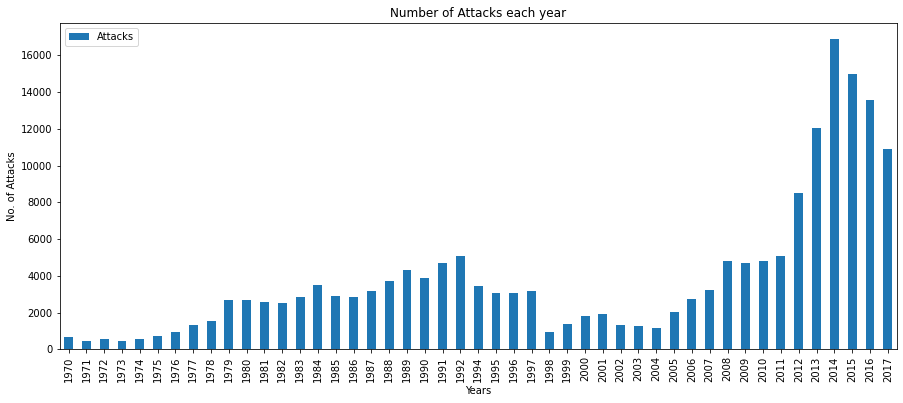

In [282]:
attacks.plot(kind="bar",figsize=(15,6))
plt.title("Number of Attacks each year")
plt.xlabel('Years')
plt.ylabel('No. of Attacks')
plt.show()


2014 has the maximum terrorist attacks and 1971 has the least

*   **Total casualties each year:**

In [283]:
cy=df[["iyear","Casualty"]].groupby("iyear").sum()
cy.head()

,Casualty
iyear,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


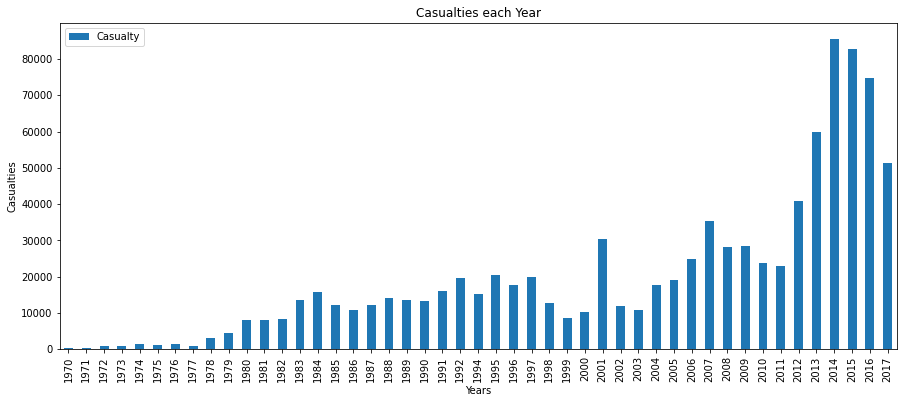

In [284]:
cy.plot(kind="bar",figsize=(15,6))
plt.title("Casualties each Year")
plt.xlabel('Years')
plt.ylabel('Casualties')
plt.show()


Casualties are in 2014 the most and least in 1971

*   **Finding out most affected areas:**

In [295]:
df['country_txt'].value_counts().sort_values(ascending=False)

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: country_txt, Length: 205, dtype: int64

The maximum number of attacks held in Iraq.

In [288]:
df['city'].head()
df['city'].value_counts().sort_values(ascending=False)

Unknown       9775
Baghdad       7589
Karachi       2652
Lima          2359
Mosul         2265
              ... 
Shahkoh          1
Pleiku           1
Mabigo           1
Engelsdorf       1
Kubentog         1
Name: city, Length: 36674, dtype: int64

In [296]:
df['provstate'].head()
df['provstate'].value_counts().sort_values(ascending=False)

Baghdad             7645
Northern Ireland    4498
Unknown             4290
Balochistan         3710
Saladin             3411
                    ... 
El Oro                 1
El Tarf                1
Saraburi               1
Voru                   1
Vidzeme                1
Name: provstate, Length: 2855, dtype: int64

In [298]:
df['location'].head()
df['location'].value_counts().sort_values(ascending=False)

The attack took place in Baghdad, Baghdad, Iraq.                                142
Belfast (Capital City)                                                           98
The incident occurred at the Donetsk Sergey Prokofiev International Airport.     62
Manhattan                                                                        60
The attack took place in Mosul, Ninawa, Iraq.                                    51
                                                                               ... 
The incident occurred in the Wahid Adhar neighborhood.                            1
The incident occurred in the Solomyanskyi district.                               1
The incident occurred between Kiunga and Mararani.                                1
The incident occurred in the Manmannti neighborhood                               1
The incident occurred in the Datu Hoffer district.                                1
Name: location, Length: 44109, dtype: int64

These results further proves that the maximum number of attacks held in the baghdad city of Iraq.

In [297]:
df['region_txt'].head()
df['region_txt'].value_counts().sort_values(ascending=False)

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64

The maximum number of attacks held in Middle East and North Africa

**The above findings conclude that the hot zone of terrorism is *Middle East and North Africa* and *South Asia*. *Iraq* is the first country which is in danger and second is *Pakistan*. These countries were targeted by the maximum attacks. *Baghdad* city of *Iraq* and *Balchistan* city of *Pakistan* faced maximum attacks.** 